<a href="https://colab.research.google.com/github/saffarizadeh/INSY4054/blob/main/AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://saffarizadeh.com/Logo.png" width="300px"/>

# *INSY 4054: Emerging Technologies*

# **AI Project**

---

Source: https://www.tensorflow.org/tutorials/generative/autoencoder

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
#@title Run this cell to get the datasets

(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

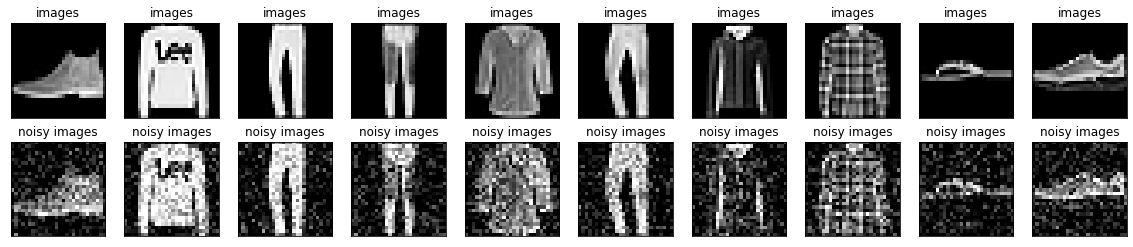

In [3]:
#@title Run this cell to view the datasets

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original images
  ax = plt.subplot(2, n, i + 1)
  plt.title("images")
  plt.imshow(tf.squeeze(x_test[i]))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display noisy images
  ax = plt.subplot(2, n, i + 1 + n)
  plt.title("noisy images")
  plt.imshow(tf.squeeze(x_test_noisy[i]))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
print(x_train_noisy.shape)
print(x_train.shape)
print(x_test_noisy.shape)
print(x_test.shape)

# First Model: `autoencoder_one`

## Step 1: Create `encoder_one` model

In [5]:
encoder_one = tf.keras.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2, input_shape=(28, 28, 1)),
      tf.keras.layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)
])

## Step 2: Create `decoder_one` model

In [6]:
decoder_one = tf.keras.Sequential([
      tf.keras.layers.Conv2DTranspose(8, (3,3), activation='relu', padding='same', strides=2),
      tf.keras.layers.Conv2DTranspose(16, (3,3), activation='relu', padding='same', strides=2),
      tf.keras.layers.Conv2D(1, (3,3), activation='sigmoid', padding='same')
])

## Step 3: Create `autoencoder_one` by putting `encoder_one` and `decoder_one` into one model

In [7]:
autoencoder_one = tf.keras.Sequential([
  encoder_one,
  decoder_one
])

## Step 4: Specify `optimizer` and `loss` function

In [8]:
autoencoder_one.compile(optimizer='adam', loss='mse')

## Step 5: Train the model using `x_train_noisy` as input and `x_train` as output with 10 `epochs`

In [ ]:
autoencoder_one.fit(x_train_noisy, x_train, epochs=10)

## Step 6: Evaluate the model using `x_test_noisy` as input and `x_test` as output

In [ ]:
autoencoder_one.evaluate(x_test_noisy, x_test)

## Step 7: Show the summary of `encoder_one` and `decoder_one` models

In [ ]:
encoder_one.summary()

In [ ]:
decoder_one.summary()

## Step 8: Use the `autoencoder_one` model to denoise `x_test_noisy` dataset

In [13]:
denoised = autoencoder_one(x_test_noisy)

In [ ]:
#@title Step 9: Run this cell to view how your model denoised the noisy images

n = 10
plt.figure(figsize=(20, 6))
for i in range(n):

    # display original + noise
    ax = plt.subplot(3, n, i + 1)
    plt.title("noisy images")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(3, n, i + n + 1)
    plt.title("denoised images")
    plt.imshow(tf.squeeze(denoised[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i + 2*n + 1)
    plt.title("actual images")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

# Second Model: `autoencoder_two`

## Step 1: Create `encoder_two` model

In [ ]:
encoder_two = tf.keras.Sequential([
  tf.keras.layers.Flatten(), # or: tf.keras.layers.Reshape((784,)), # or: tf.keras.layers.Reshape((-1,)),
  tf.keras.layers.Dense(64, activation='relu')
])

## Step 2: Create `decoder_two` model

In [ ]:
decoder_two = tf.keras.Sequential([
  tf.keras.layers.Dense(784, activation='sigmoid'),
  tf.keras.layers.Reshape((28,28))
])

## Step 3: Create `autoencoder_two` model

In [ ]:
autoencoder_two = tf.keras.Sequential([
  encoder_two,
  decoder_two
])

## Step 4: Specify `optimizer` and `loss` function

In [ ]:
autoencoder_two.compile(optimizer='adam', loss='mse')

## Step 5: Train the model using `x_train` as input and `x_train` as output with 10 `epochs`

In [ ]:
autoencoder_two.fit(x_train, x_train, epochs=10)

## Step 6: Evaluate the model using `x_test` as input and `x_test` as output

In [ ]:
autoencoder_two.evaluate(x_test, x_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0088


0.008765392936766148

## Step 7: Show the summary of `encoder_two` and `decoder_two` models

In [ ]:
encoder_two.summary()

In [ ]:
decoder_two.summary()

## Step 8: Use the model to encode and decode images

You can use the code below to encode images

In [ ]:
encoded_imgs = encoder_two(x_test).numpy()

In [ ]:
encoded_imgs.shape

You can the code below to decode the encoded images

In [ ]:
decoded_imgs = decoder_two(encoded_imgs).numpy()

In [ ]:
decoded_imgs.shape

Here is the compression ratio:

In [ ]:
(decoded_imgs.shape[1]*decoded_imgs.shape[2]) / encoded_imgs.shape[1]